## Import libraries

In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt
import imageio
from IPython.display import Video
import os

root = "../datasets/media/claudia"


## Import data

In [4]:
MAX_FRAMES = 280
FRAME_SKIP = 14

videos = []
for f in os.listdir(root):
    videos.append(torchvision.io.read_video(root+"/"+f, output_format="TCHW")[0][:MAX_FRAMES][::FRAME_SKIP])

for v in videos:
    print(v.shape)

videos = torch.stack(videos)


/home/hugo/.local/share/virtualenvs/model-vcp1ZfvJ/lib/python3.10/site-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([20, 3, 1080, 1920])
torch.Size([20, 3, 1080, 1920])
torch.Size([20, 3, 1080, 1920])


## Preprocess data

For further processing, we want to apply the following transformations:
- convert to black and white
- resize
- change the type to float (instead of byte)
- normalize the data between 0 and 1 (instead of 0 and 255).

In [5]:
videos = torchvision.transforms.functional.rgb_to_grayscale(videos) # convert to black and white
videos = videos[:,:,0,:,:] # remove grayscale channel
videos = torchvision.transforms.Resize((128,128))(videos)
videos = videos.float()
videos /= 255 # normalize



/home/hugo/.local/share/virtualenvs/model-vcp1ZfvJ/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


## Explore data

In [6]:
print("Shape:", list(videos.shape))

Shape: [3, 20, 128, 128]


There are 3 videos of 10 frames. Each frame is made of 64x64 pixels.

Mean value: 0.3865658640861511
Min value: 0.0
Max value: 0.8509804010391235


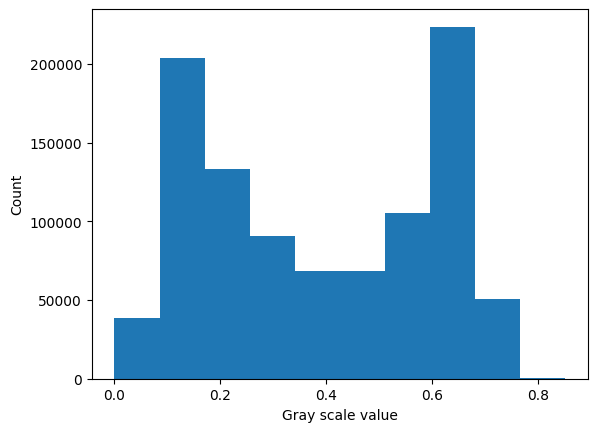

In [7]:
print("Mean value:", videos.mean().item())
print("Min value:", videos.min().item())
print("Max value:", videos.max().item())

# histogram of the first 5 videos
plt.hist(videos[:5].reshape(-1))
plt.xlabel("Gray scale value")
plt.ylabel("Count")
plt.show()

### Let's visualize the first videos of the dataset

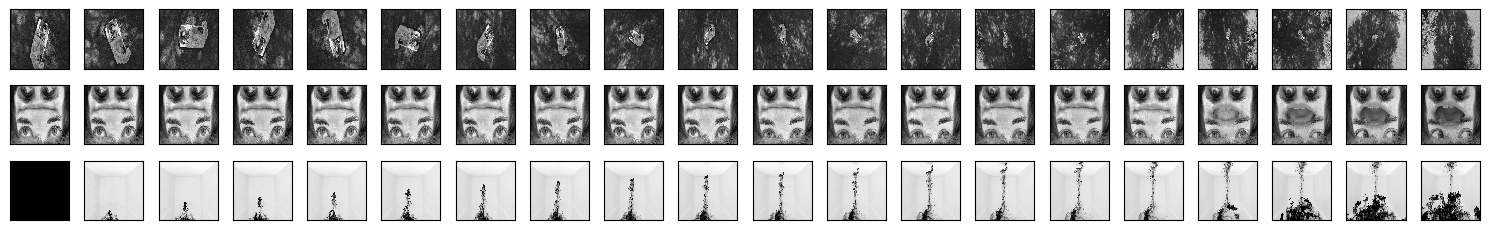

In [9]:
fig, ax = plt.subplots(ncols=videos.shape[1], nrows=videos.shape[0], figsize=(15,2.5))
for i in range(videos.shape[0]):
    for j in range(videos.shape[1]):
        ax[i,j].matshow(videos[i,j,:,:], cmap="gray")
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()